# **Exemplo Classificadores**

Base de dados sobre vinhos (wine).
Disponível em: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

O dataset distribuido no Kaggle.com possui apenas variáveis ​​físico-químicas (entradas) e sensoriais (saída).

**Variáveis de entrada (com base em testes físico-químicos):**


1. Fixed acidity - Acidez fixa
2. Volatile acidity -  Acidez volátil
3. Citric acid - Ácido cítrico
4. Residual sugar - açúcar residual
5. Chlorides - cloretos
6. Free sulfur dioxide - dióxido de enxofre livre
7. Total sulfur dioxide - dióxido de enxofre total
8. Density - densidade
9. pH
10. Sulphates - sulfatos
11. Alcohol - álcool

**Variável de Saída:**
12. Quality - qualidade (pontuação entre 0 e 10) - target (com base em dados sensoriais)

**Referências:** P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.



# **Etapa 1 - Pré-processamento**

Realize todas a fases de pré-processamento, incluindo:
* Remoção de atributos faltantes.
* Normalização ou padronização.
* Transformação de valores, se for o caso.

In [1]:
#importações utilizadas neste Projeto
import warnings
warnings.filterwarnings('ignore') #ignorar erros
import pandas as pd # biblioteca para o processamento de dados, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #biblioteca para gráficos e visualização de dados
import seaborn as sns #biblitoca para visualização de dados baseada no matplotlib
from sklearn.model_selection import train_test_split #treinamento dos modelos
from sklearn.metrics import classification_report, confusion_matrix #métricas de classificação

#Importa os métodos de classificação

#import tree
from sklearn.tree import DecisionTreeClassifier
# importing RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
#import KNN
from sklearn.neighbors import KNeighborsClassifier
#import Naive Bayes
from sklearn.naive_bayes import GaussianNB
#import SVM
from sklearn.svm import SVC
#import rede neural MLP
from sklearn.neural_network import MLPClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Exemplo_classificadores/winequality-red.csv') #carregar o arquivo csv para o data frame wine
df_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
# Procurante atributos faltantes nos dados
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#df_wine = df_wine.dropna(subset=['pH']) #exemplo para remover as linhas que possuem dados faltantes
#df_wine.update(df_wine['pH'].fillna(0)) #exemplo para substituir NaN por 0

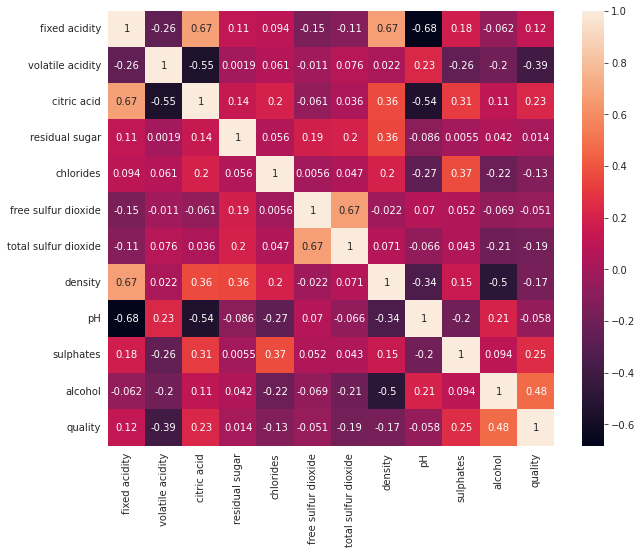

In [ ]:
#gráfico de correlação entre as variáveis - utiliza o default o método de Pearson - Exemplo: https://www.inf.ufsc.br/~vera.carmo/Correlacao/Correlacao_Pearson_Spearman_Kendall.pdf
plt.figure(figsize = (10,8))
sns.heatmap(df_wine.corr(),annot=True)

In [ ]:
#contagem das diferentes classes presentes no dataset
print("Contagem da variável output")
df_wine['quality'].value_counts()

Contagem da variável output


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

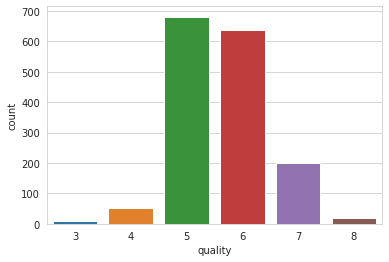

In [ ]:
#exibe gráfico de coluna
sns.set_style('whitegrid')
sns.countplot(df_wine['quality'])

In [ ]:
df_wine['quality'].unique() #mostra as classes do dataset

array([5, 6, 7, 4, 8, 3])

In [ ]:
#agrupando as classes em apenas 2 tipos de qualidade
new=[]
for row in df_wine['quality']:
    if (row<=5):
        val=1
    else:
        val=2
    new.append(val)
df_wine['newquality']=new
df_wine.head(10)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,newquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,2
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,2
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


In [ ]:
print("Contagem da variável New Quality")
df_wine['newquality'].value_counts()

Contagem da variável New Quality


2    855
1    744
Name: newquality, dtype: int64

In [ ]:
#Separa os dados em 2 conjuntos X (variáveis de entrada) e Y (variável preditora)
X = df_wine.drop('quality', axis = 1)
y = df_wine['newquality']

In [ ]:
#separa os dados em treinamento (70%- 1.119 registros) e teste (30% - 480 registros)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
print(X_train)

      fixed acidity  volatile acidity  ...  alcohol  newquality
858            11.7             0.280  ...     10.6           2
654             8.6             0.470  ...      9.5           1
721             8.9             0.480  ...      9.2           1
176             7.3             0.380  ...      9.5           1
692             8.6             0.490  ...      9.0           1
...             ...               ...  ...      ...         ...
53              8.6             0.380  ...      9.4           1
350            10.7             0.670  ...      9.9           2
79              8.3             0.625  ...      9.1           1
792             7.1             0.610  ...      9.7           2
1544            8.4             0.370  ...     11.2           2

[1119 rows x 12 columns]


In [ ]:
#transforma os dados na mesma escala - normaliza os dados
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
print(X_train)

[[ 1.9404823  -1.40893624  1.01909277 ...  0.08253001  0.19784958
   0.9317261 ]
 [ 0.15795998 -0.36064685  1.01909277 ... -1.18835636 -0.84474641
  -1.07327679]
 [ 0.33046214 -0.30547373 -0.1455265  ... -0.76472757 -1.12909078
  -1.07327679]
 ...
 [-0.01454218  0.4945366  -0.34806898 ...  2.80585793 -1.22387223
  -1.07327679]
 [-0.70455083  0.41177691 -1.25951015 ... -0.34109878 -0.65518351
   0.9317261 ]
 [ 0.04295854 -0.91237811  0.81655029 ...  0.92978758  0.7665383
   0.9317261 ]]


# **Etapa 2 - Classificadores**
Algoritmos de Classificação:

* K-vizinhos (encontre o melhor k)
* Árvore de decisão
* Naive Bayes
* SVM (encontre o melhor C)
* Random Forest (encontre o melhor número de estimadores)

# **KNN (K Vizinhos mais Próximos)**

O algoritmo de classificação dos K-vizinhos mais próximos é especialmente simples e intuitivo. Existe desde 1910.
Classifica o exemplo simplesmente de acordo com a sua semelhança em relação ao conjunto de treino.
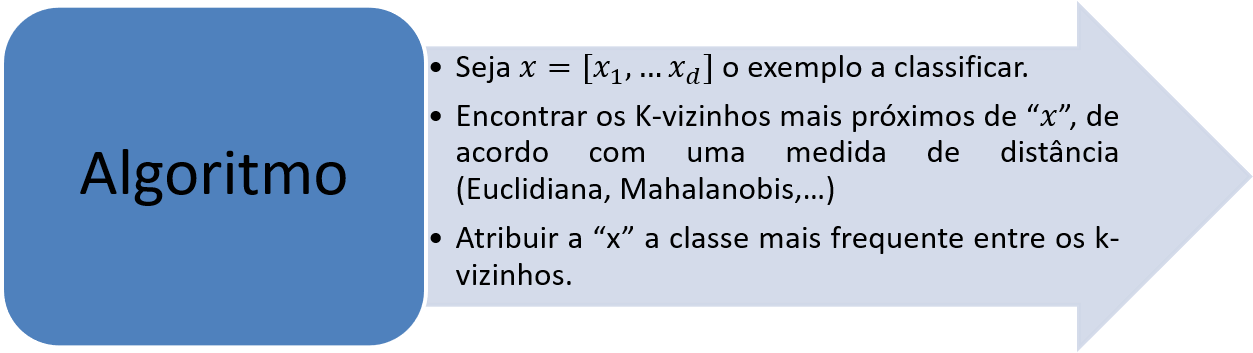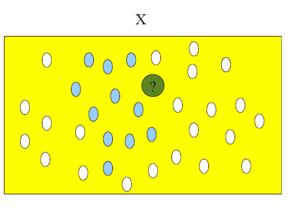




In [ ]:
#realiza o treinamento no modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train, y_train)

#realiza a predição
knn_pred = knn_model.predict(X_test)

# Métricas de Classificação


*   Precisão (Precision): Mostra o preditivo sobre cada classe
*   Revocação (Recall): Mostra a sensibilidade de cada classe
*   Acurácia (Accuracy): apura o total classificado corretamente
*   𝐅𝟏 Score corresponde à média harmônica simples das medidas Precisão e Revocação.
*   Macro AVG: Macro Média
*   Weighted AVG: Média Ponderada










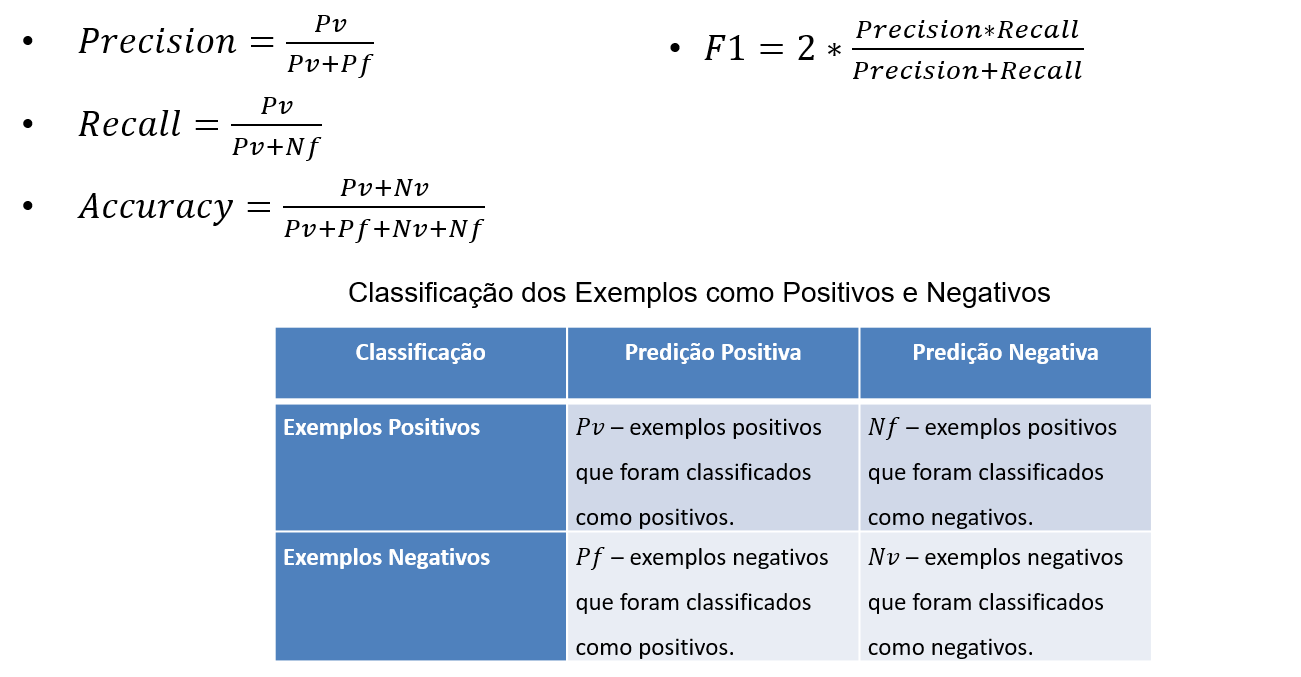tricas

Resultado do Modelo KNN
              precision    recall  f1-score   support

           1       0.99      0.98      0.98       224
           2       0.98      0.99      0.98       256

    accuracy                           0.98       480
   macro avg       0.98      0.98      0.98       480
weighted avg       0.98      0.98      0.98       480

Resultado da matriz de Confusão do KNN


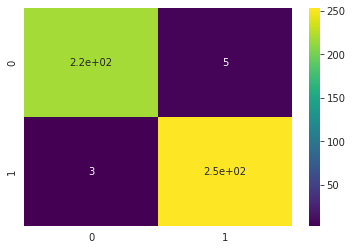

In [ ]:
print("Resultado do Modelo KNN")
print(classification_report(y_test, knn_pred))
print("Resultado da matriz de Confusão do KNN")
confu_mat = confusion_matrix(y_test, knn_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

# **Árvore de Decisão**

As Árvores de Decisão são representações simples do conhecimento de forma hierárquica.Podem utilizar: Probabilidade e Indução de Regras. 

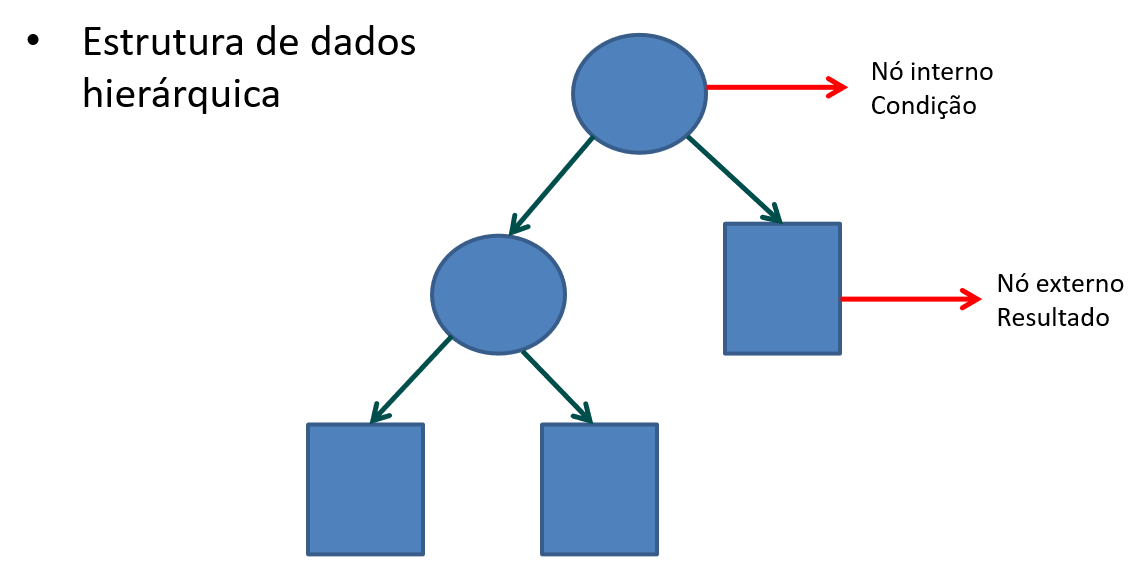

In [ ]:
#realiza o treinamento no modelo Tree
tree_model = DecisionTreeClassifier() 
tree_model.fit(X_train, y_train)

#realiza a predição
tree_pred = tree_model.predict(X_test)


Resultado do Modelo Tree
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       224
           2       1.00      1.00      1.00       256

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

Resultado da matriz de Tree


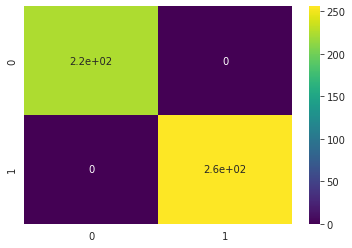

In [ ]:
print("Resultado do Modelo Tree")
print(classification_report(y_test, tree_pred))
print("Resultado da matriz de Tree")
confu_mat = confusion_matrix(y_test, tree_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

# Naive Bayes

Algoritmo de AM totalmente baseado em:
1.   Manipulações probabilísticas
2.   Hipótese de independência dos atributos


GaussianNB implementa o algoritmo Gaussian Naive Bayes para classificação. A probabilidade dos recursos é assumida como gaussiana.

https://scikit-learn.org/stable/modules/naive_bayes.html

In [ ]:
#realiza o treinamento no modelo Gaussiano
gaus_model = GaussianNB()
gaus_model.fit(X_train, y_train)

#realiza a predição
gaus_pred = gaus_model.predict(X_test)


Resultado do Modelo Naive Bayes
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       224
           2       1.00      1.00      1.00       256

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

Resultado da matriz de Naive Bayes


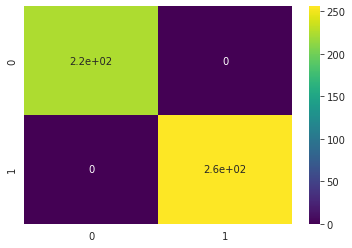

In [ ]:
print("Resultado do Modelo Naive Bayes")
print(classification_report(y_test, gaus_pred))
print("Resultado da matriz de Naive Bayes")
confu_mat = confusion_matrix(y_test, gaus_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

# SVM (Máquinas de Vetores de Suporte)

Os algoritmos de aprendizado baseados em SVM podem ser definidos em um hiperplano no espaço de exemplos que tenta separá-los em classes positivas e negativas. 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC


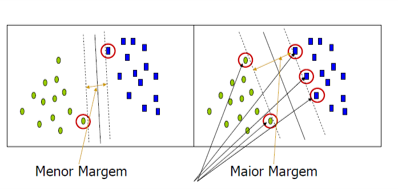


In [ ]:
#realiza o treinamento no modelo SVM
svm_model = SVC(C=1) 
svm_model.fit(X_train, y_train)

#realiza a predição
svm_pred = svm_model.predict(X_test)

Resultado do Modelo SVM
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       224
           2       0.99      1.00      1.00       256

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

Resultado da matriz de SVM


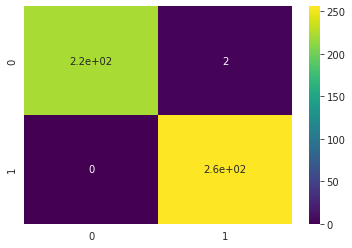

In [ ]:
print("Resultado do Modelo SVM")
print(classification_report(y_test, svm_pred))
print("Resultado da matriz de SVM")
confu_mat = confusion_matrix(y_test, svm_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

# Random Forest

Random Forest é um dos algoritmos mais utilizados na estratégia Bagging (Aprendizado Paralelo), consiste no agrupamento de múltiplas árvores de decisão, que garantem alta variância. 
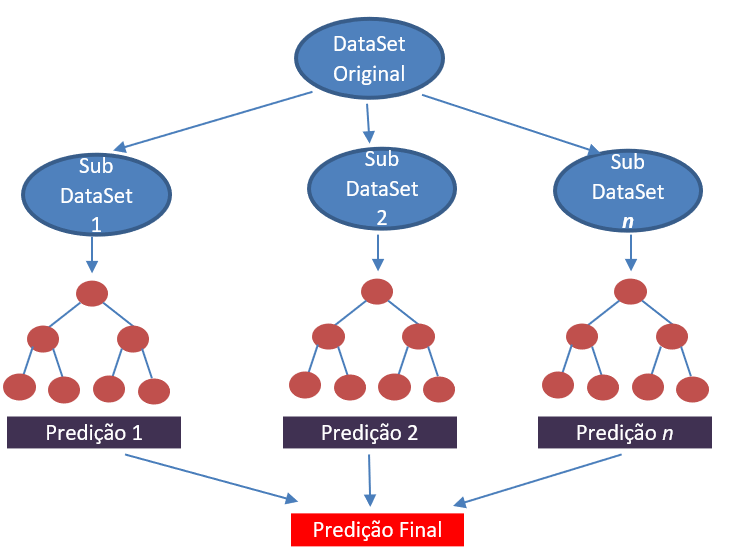

Parâmetros do Número de Estimadores
n_estimators int, default=100

In [ ]:
#realiza o treinamento no modelo RandomForest
ran_fc = RandomForestClassifier(n_estimators=100)
ran_fc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#realiza a predição ou seja o teste
rfc_pred = ran_fc.predict(X_test)

In [ ]:
print("Resultado do Modelo RandomForest")
print(classification_report(y_test, rfc_pred)) #realiza a comparação entre o real e o predito

Resultado do Modelo RandomForest
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       224
           2       1.00      1.00      1.00       256

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



Resultado da matriz de Confusão do RandomForest


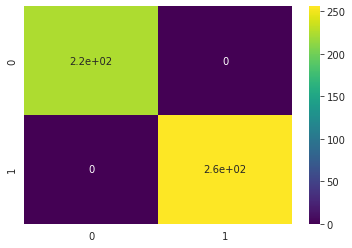

In [ ]:
print("Resultado da matriz de Confusão do RandomForest")
confu_mat = confusion_matrix(y_test, rfc_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

# Rede Neural

In [ ]:
#realiza o treinamento no modelo Rede Neural Multi Layer Perceptron
mlp_model = MLPClassifier(random_state=1, max_iter=400) 
mlp_model.fit(X_train, y_train)

#realiza a predição
mlp_pred = mlp_model.predict(X_test)

Resultado do Modelo Rede Neural Multi Layer Perceptron
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       224
           2       1.00      1.00      1.00       256

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

Resultado da matriz Rede Neural Multi Layer Perceptron


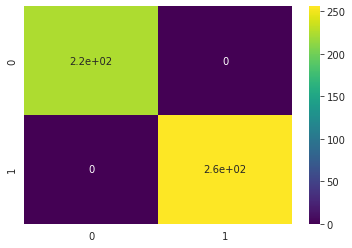

In [ ]:
print("Resultado do Modelo Rede Neural Multi Layer Perceptron")
print(classification_report(y_test, mlp_pred))
print("Resultado da matriz Rede Neural Multi Layer Perceptron")
confu_mat = confusion_matrix(y_test, mlp_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

# **3. Resultados da Acurácia e Precisão**

Apresente a (1) Acurácia e Precisão dos modelos e (2) justifique qual método deve ser usado para classificação dos Vinhos.

Os algoritmos apresentaram apresentaram capacidade de predizer as classes 5, 6 e 7, porém, não tiveram sucesso na prdição das classes 3 e 8 (possuem poucos registros).

Desse modo, o algoritmo que conseguiu evoluir mais na predição foi o SVM.

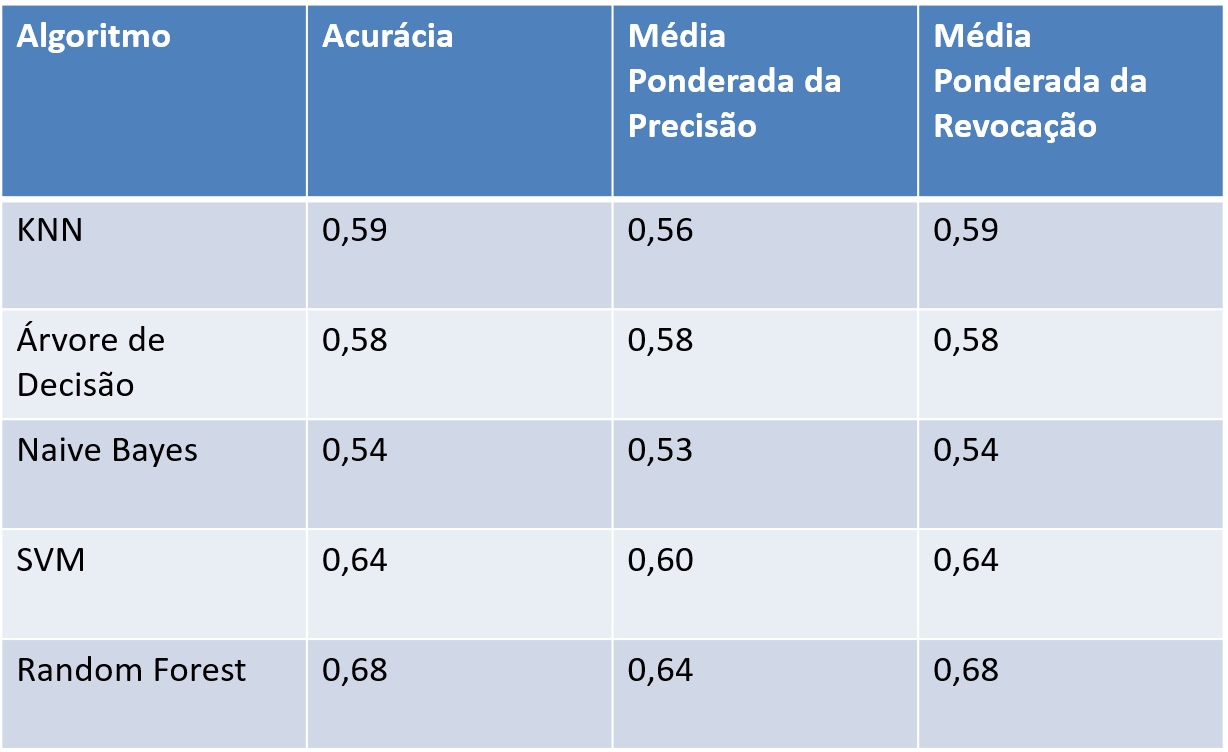